In [36]:
from pytrends.request import TrendReq

#create a pytrends object, request data from Google trends
pytrends = TrendReq(hl='en-US')

#extract data about keywords
keywords = ['Python','C++','Java','HTML','ML']
pytrends.build_payload(keywords,timeframe='today 5-y')

#specify and get data
data = pytrends.interest_over_time()
data

,Python,C++,Java,HTML,ML,isPartial
date,,,,,,
2017-01-22,20,79,36,18,17,False
2017-01-29,20,80,38,19,17,False
2017-02-05,22,82,39,20,17,False
2017-02-12,22,83,38,20,18,False
2017-02-19,22,85,40,20,17,False
...,...,...,...,...,...,...
2021-12-19,20,75,18,8,24,False
2021-12-26,17,71,15,7,22,False
2022-01-02,21,80,17,8,21,False


In [37]:
data['isPartial'] = data['isPartial'].map({'False': 0,'True': 1})
type(data)

pandas.core.frame.DataFrame

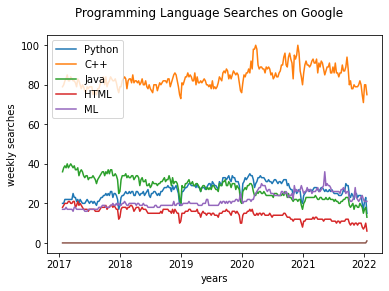

In [40]:
#plot data
import matplotlib.pyplot as plt

plt.plot(data)

#add titles
plt.suptitle('Programming Language Searches on Google')
plt.xlabel('years')
plt.ylabel('weekly searches')

#add Legend
plt.legend(keywords, loc='upper left')
plt.savefig('data.png')

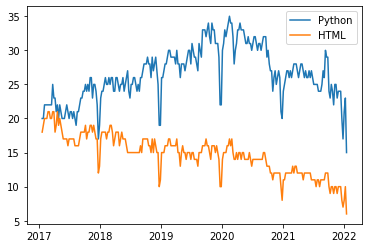

In [42]:
#analyze data
focus = ['Python', 'HTML']

plt.plot(data[focus])
plt.legend(focus)

In [43]:
#extract country-Level data about the keywords
data2 = pytrends.interest_by_region(resolution='COUNTRY', inc_low_vol = True)

#get countries with the most searches of 'Python' over the years
data2 = data2['Python'].nlargest(10)
data2

geoName
Eritrea        54
China          51
Israel         39
St. Helena     33
Singapore      29
South Korea    29
Russia         26
Taiwan         26
Hong Kong      25
Norway         25
Name: Python, dtype: int32

In [45]:
type(data)

pandas.core.frame.DataFrame

In [46]:
#convert to Dataframe
data2 = data2.to_frame()
data2

,Python
geoName,
Eritrea,54
China,51
Israel,39
St. Helena,33
Singapore,29
South Korea,29
Russia,26
Taiwan,26
Hong Kong,25


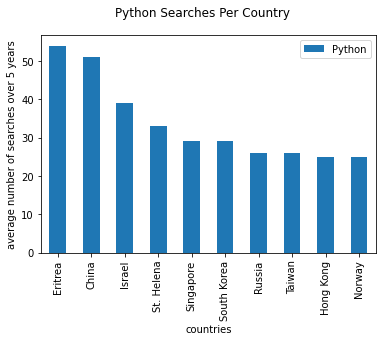

In [48]:
#plot bar chart with Pandas
data2.plot(kind='bar')

#add titles
plt.suptitle('Python Searches Per Country')
plt.xlabel('Countries')
plt.ylabel('average number of searches over 5 years')

plt.show()

In [51]:
#plot a bar chart with multiple keywords
data3 = pytrends.interest_by_region(resolution='COUNTRY', inc_low_vol=True)
data3 = data3[55:60]
data3

,Python,C++,Java,HTML,ML
geoName,,,,,
Cuba,19,40,19,11,11
Curaçao,9,50,6,10,25
Cyprus,15,46,13,11,15
Czechia,17,42,16,10,15
Côte d’Ivoire,8,54,25,8,5


<AxesSubplot:xlabel='geoName'>

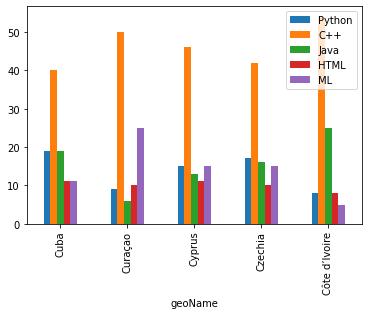

In [52]:
data3.plot(kind='bar')